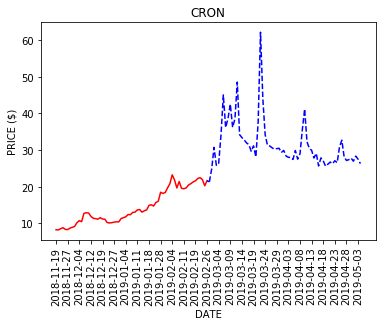

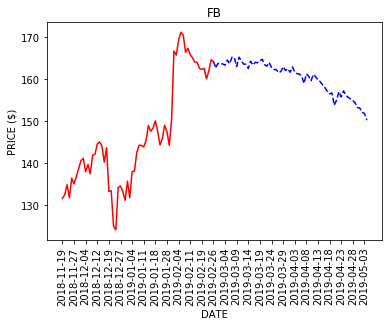

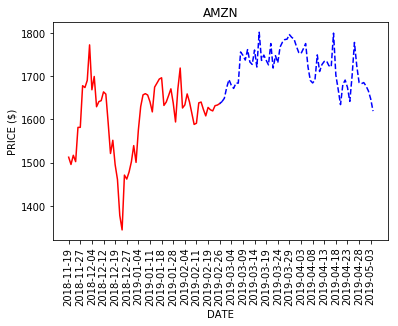

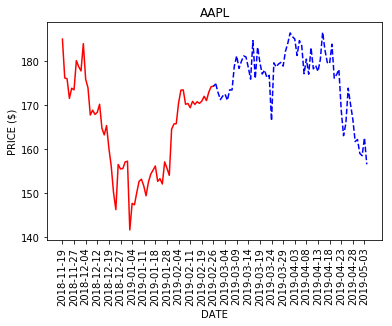

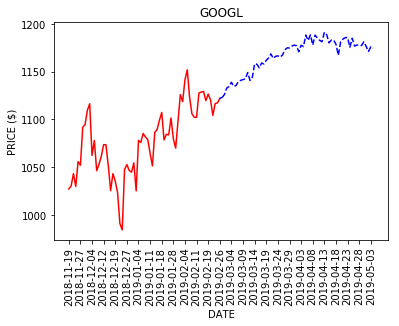

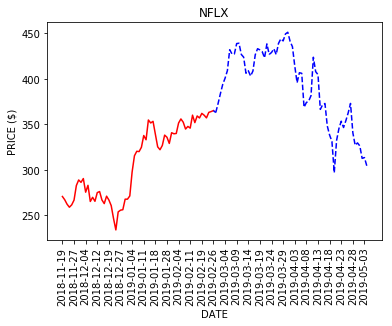

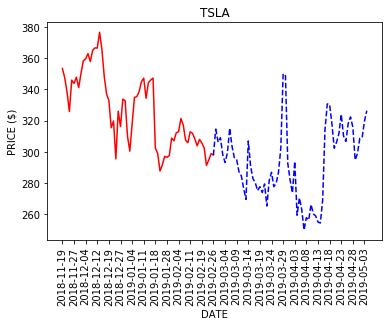

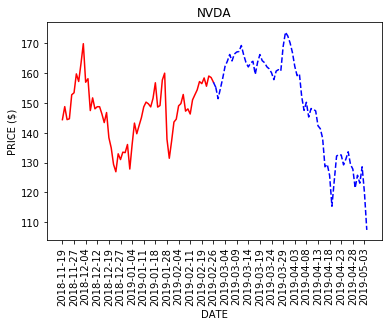

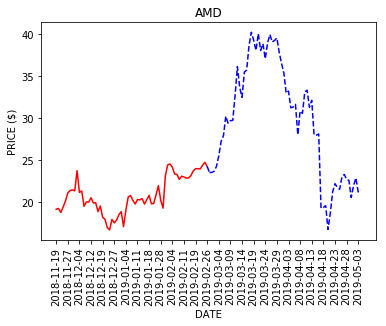

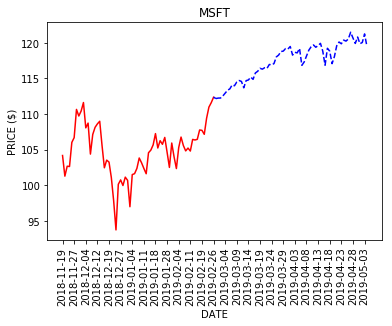

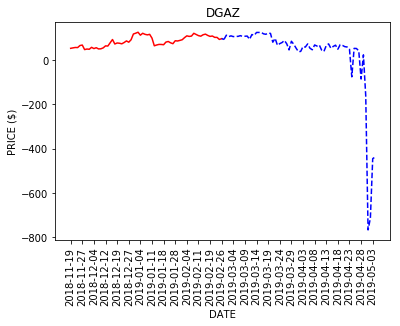

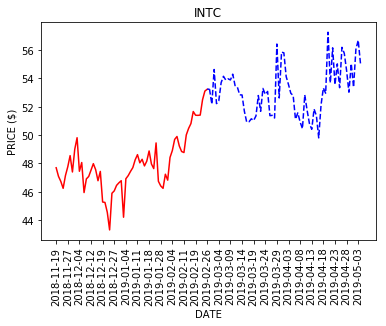

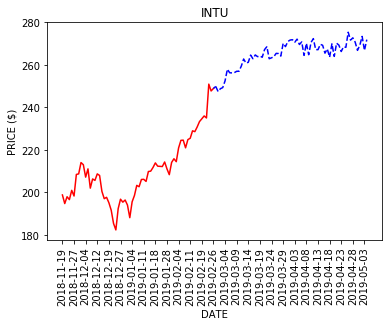

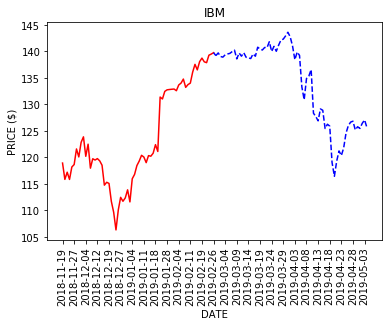

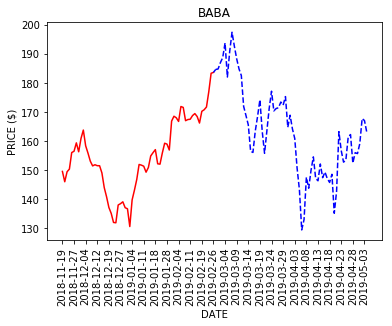

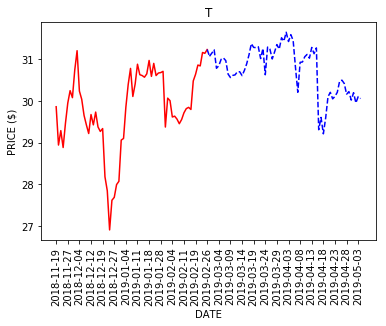

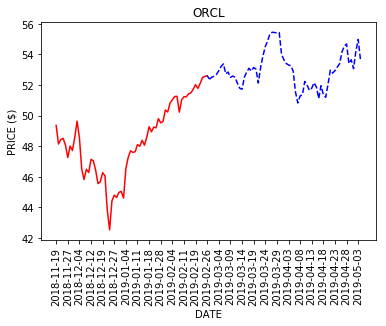

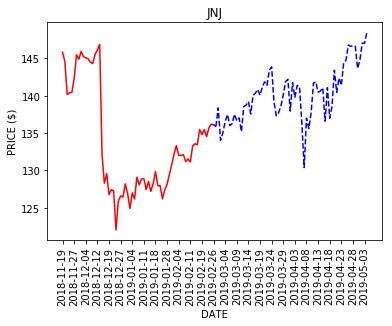

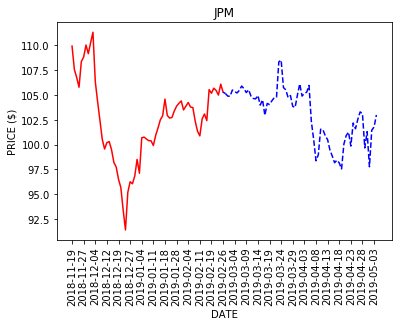

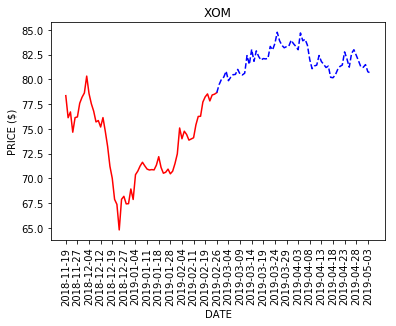

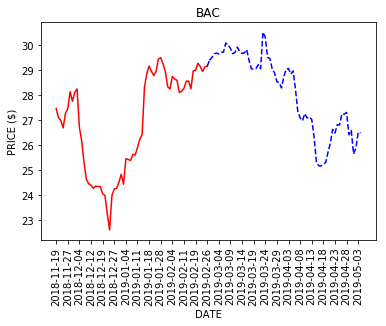

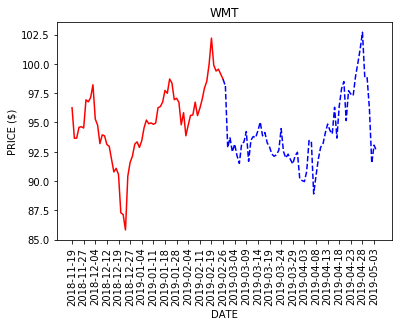

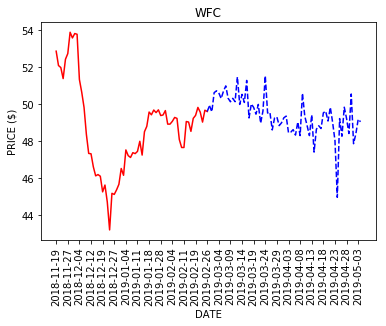

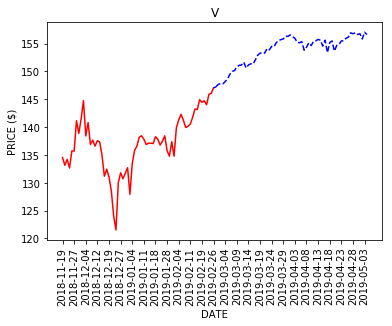

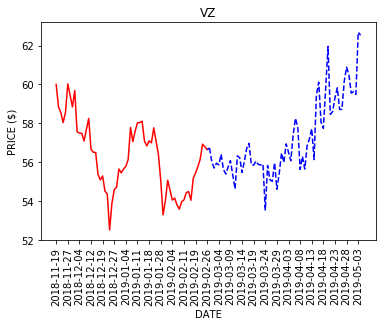

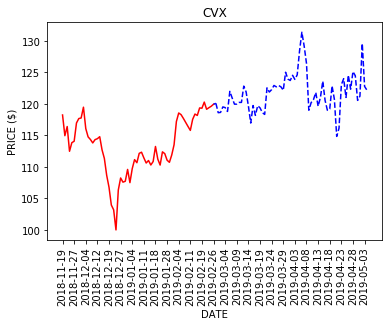



   (1) TICKERS  (2) STOCK SCORE  (3) RISK SCORE
0         CRON       100.000000       57.077608
11        INTC        99.999998       59.266764
14        BABA        99.999903       60.588500
5         NFLX        99.999859       60.947351
16        ORCL        99.999400       58.079633
24          VZ        99.998679       53.248298
12        INTU        99.975938       62.283025
19         XOM        99.923494       51.066571
17         JNJ        99.330637       59.468224
25         CVX        99.179302       58.023649
6         TSLA        52.410997       55.699335
23           V        51.855504       62.395292
21         WMT        51.572550       56.562670
9         MSFT        51.096070       62.465155
8          AMD        50.996291       58.916072
13         IBM        50.859713       51.678534
15           T        50.172566       53.511541
4        GOOGL        50.100661       61.480395
20         BAC        50.040066       60.410555
22         WFC        50.008755       

In [2]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from iexfinance import Stock, get_historical_data

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection

import math
import pandas as pd
import numpy as np

tickers = ["CRON", "FB", "AMZN", "AAPL", "GOOGL", "NFLX", "TSLA", "NVDA", "AMD",
           "MSFT", "DGAZ", "INTC", "INTU", "IBM", "BABA", "T", "ORCL", 
           "JNJ", "JPM", "XOM", "BAC", "WMT", "WFC", "V", "VZ", "CVX"]

global stock_list
stock_list = []
global risk_list
risk_list = []

def stock(ticker):
    
    out = int(66)
    df = get_historical_data(ticker, None, None, output_format = 'pandas')
    df['100MA'] = df['close'].rolling(window = 100, min_periods = 0).mean()
    df['O/C PC'] = (df['close']-df['open'])/df['open']*100
    
    daters = df.index
    actuality = df['close'].tolist()
    
    variable1 = 'open'
    variable2 = 'close'
    df.fillna(-1000000, inplace = True)
    
    df['PREDICTION1'] = df[[variable1]].shift(-out)
    df['PREDICTION2'] = df[[variable2]].shift(-out)
    
    df.dropna(inplace = True)

    x = df.drop(['PREDICTION1'], 1)
    x = x.drop(['PREDICTION2'], 1)
    
    x = np.array(x)
    x = preprocessing.scale(x)
    
    x_out = x[-out:]
    x = x[:-out]
    
    y = df[['PREDICTION1', 'PREDICTION2']]
    y = y[:-out]
    
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(x_train, y_train)
    r2 = model.score(x_test, y_test)
    prediction = model.predict(x_out)
    
    opening = []
    closing = []
    for a in range(len(prediction)):
        opening.append(prediction[a][0])
        constant = actuality[len(actuality) - 1]/prediction[0][1]
        closing.append(constant*prediction[a][1])

    predict_dates = []
    date1 = datetime.today().strftime('%Y-%m-%d')
    date2 = (datetime.today() + timedelta (days = out-1)).strftime('%Y-%m-%d')
    start = datetime.strptime(date1, '%Y-%m-%d')
    end = datetime.strptime(date2, '%Y-%m-%d')
    step = timedelta(days = 1)
    while(start <= end):
        predict_dates.append(start.date().strftime('%Y-%m-%d'))
        start += step
        
    predict_close = []
    for b in range(len(predict_dates)):
        predict_close.append(closing[b])

    actual_dates = []
    for c in range(len(predict_dates)):
        actual_dates.append(daters[len(daters) - len(predict_dates) + c -1])
        
    actual_close = []
    for d in range(len(predict_dates)):
        actual_close.append(actuality[len(actuality) - len(predict_dates) + d -1])
    
    end_date = actual_dates[len(actual_dates) - 1]
    start_date = predict_dates[0]
    end_close = actual_close[len(actual_close) - 1]
    start_close = predict_close[0]
    
    x_line = [end_date, start_date]
    y_line = [end_close, start_close]
    
    plt.plot(actual_dates, actual_close, color = 'red')
    plt.plot(x_line, y_line, color = 'blue', linestyle = '--')
    plt.plot(predict_dates, predict_close, color = 'blue', linestyle = '--')
    
    x_total = []
    for e in range(len(actual_dates)):
        x_total.append(actual_dates[e])
    for f in range(len(predict_dates)):
        x_total.append(predict_dates[f])
        
    x_graph = []
    for g in range(0, len(x_total), 5):
        x_graph.append(x_total[g])
        
    plt.xticks(range(0, len(x_total), 5), x_graph)
    plt.xticks(rotation = 90)
    
    plt.title(ticker)
    plt.ylabel("PRICE ($)")
    plt.xlabel("DATE")
    plt.show()
    
    
    def weekly_volatility():
        staging = []
        counter = 0
        v_weekly_returns = []
        
        for h in range(len(prediction)):
            open1 = opening[h]
            close1 = closing[h]
            staging.append((close1-open1)/open1*100)
            counter += 1
            if(counter == 5):
                v_weekly_returns.append(sum(staging)/5)
                staging.clear()
                counter = 0
            elif(h == len(prediction) and counter < 5):
                v_weekly_returns.append(sum(staging)/counter)
                staging.clear()
                counter = 0
        return sum(v_weekly_returns)/len(v_weekly_returns)
    
    def weekly():
        weekly_returns = []
        
        for i in range(0, len(prediction), 4):
            if(i+4 < len(prediction)):
                open1 = opening[i]
                close1 = closing[i+4]
                weekly_returns.append((close1-open1)/open1*100)
            else:
                open1 = opening[i]
                close1 = closing[len(prediction)-1]
                weekly_returns.append((close1-open1)/open1*100)
        return sum(weekly_returns)/len(weekly_returns)
    
    def monthly_volatility():
        staging = []
        counter = 0
        v_monthly_returns = []
        
        for j in range(len(prediction)):
            open1 = opening[j]
            close1 = closing[j]
            staging.append((close1-open1)/open1*100)
            counter += 1
            if(counter == 22):
                v_monthly_returns.append(sum(staging)/22)
                staging.clear()
                counter = 0
            elif(j == len(prediction) and counter < 22):
                v_monthly_returns.append(sum(staging)/counter)
                staging.clear()
                counter = 0
        return sum(v_monthly_returns)/len(v_monthly_returns)
    
    def monthly():
        monthly_returns = []
        
        for k in range(0, len(prediction), 21):
            if(k+21 < len(prediction)):
                open1 = opening[k]
                close1 = closing[k+21]
                monthly_returns.append((close1-open1)/open1*100)
            else:
                open1 = opening[k]
                close1 = closing[len(prediction)-1]
                monthly_returns.append((close1-open1)/open1*100)
        return sum(monthly_returns)/len(monthly_returns)

    def performance_score(week, month):
        global stock_list
        letter = "A"
        
        try:
            score_weekly = 50 / (1 + math.exp(-.125 * (16*week))) + 50
        except OverflowError:
            score_weekly = float('inf')
        
        try:
            score_monthly = 50 / (1 + math.exp(-.125 * (8*month))) + 50
        except OverflowError:
            score_monthly = float('inf')

        stock_score = (score_weekly+score_monthly)/2
        if(stock_score >= 97):
            letter = "A+"
        elif(stock_score >= 93 and stock_score < 97):
            letter = "A"
        elif(stock_score >= 90 and stock_score < 93):
            letter = "A-"
        elif(stock_score >= 87 and stock_score < 90):
            letter = "B+"
        elif(stock_score >= 83 and stock_score < 87):
            letter = "B"
        elif(stock_score >= 80 and stock_score < 83):
            letter = "B-"
        elif(stock_score >= 77 and stock_score < 80):
            letter = "C+"
        elif(stock_score >= 73 and stock_score < 77):
            letter = "C"
        elif(stock_score >= 70 and stock_score < 73):
            letter = "C-"
        elif(stock_score >= 67 and stock_score < 70):
            letter = "D+"
        elif(stock_score >= 63 and stock_score < 67):
            letter = "D"
        elif(stock_score >= 60 and stock_score < 63):
            letter = "D-"
        elif(stock_score < 60):
            letter = "F"
        #print("STOCK: ", stock_score, letter)
        stock_list.append(stock_score)
        return stock_score
    
    def risk_score(v_week, v_month):
        global risk_list
        letter = "A"

        try:
            score_r2 = 50/(1+math.exp(-.125*(32*(r2-.7)))) + 50
        except OverflowError:
            score_r2 = float(50)

        try:
            score_volatility_weekly = 50/(1+math.exp(-.0225*(200-(500*abs(v_week))))) + 50
        except OverflowError:
            score_volatility_weekly = float(50)
        
        try:    
            score_volatility_monthly = 50/(1+math.exp(-.0225*(200-(5000*abs(v_month))))) + 50
        except OverflowError:
            score_volatility_monthly = float(50)

        risk = (score_r2 + score_volatility_weekly+score_volatility_monthly) / 3
        if(risk >= 97):
            letter = "A+"
        elif(risk >= 93 and risk < 97):
            letter = "A"
        elif(risk >= 90 and risk < 93):
            letter = "A-"
        elif(risk >= 87 and risk < 90):
            letter = "B+"
        elif(risk >= 83 and risk < 87):
            letter = "B"
        elif(risk >= 80 and risk < 83):
            letter = "B-"
        elif(risk >= 77 and risk < 80):
            letter = "C+"
        elif(risk >= 73 and risk < 77):
            letter = "C"
        elif(risk >= 70 and risk < 73):
            letter = "C-"
        elif(risk >= 67 and risk < 70):
            letter = "D+"
        elif(risk >= 63 and risk < 67):
            letter = "D"
        elif(risk >= 60 and risk < 63):
            letter = "D-"
        elif(risk < 60):
            letter = "F"
        #print("RISK:  ", risk, letter)
        risk_list.append(risk)
        return risk
    
    if(out >= 5):
        v_week = weekly_volatility()
        week = weekly()
    if(out >= 22):
        v_month = monthly_volatility()
        month = monthly()
    
    performance_score(week, month)
    print()
    risk_score(week, month)
    print()
    
for z in range(len(tickers)):
    stock(tickers[z])
    
d = {'(1) TICKERS': tickers, '(2) STOCK SCORE': stock_list, '(3) RISK SCORE': risk_list}
table = pd.DataFrame(data = d)
print(table.sort_values(by = ['(2) STOCK SCORE'], ascending = False))
    
best_score = []
worst_score = []

best_risk = []
worst_risk = []

for i in range(5):
    ind = stock_list.index(max(stock_list))
    best_score.append(tickers[ind])
    stock_list.remove(max(stock_list))
    
    best_risk.append(tickers[risk_list.index(max(risk_list))])
    risk_list.remove(max(risk_list))
    
    tickers.remove(tickers[ind])

print("BEST SCORE: ", best_score)
print("BEST RISK: ", best_risk)

    